In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv("placement.csv")

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df= df.iloc[:,1:]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [7]:
df.shape

(100, 3)

In [9]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model
    

In [10]:
import matplotlib.pyplot as plt


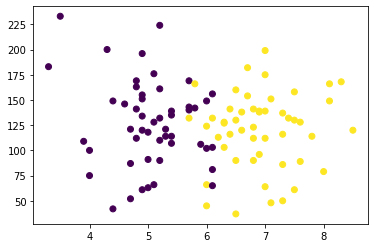

In [12]:
plt.scatter(df["cgpa"],df["iq"],c=df["placement"])

In [13]:
df.head(2)

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0


In [18]:
x=df.iloc[:,:2]
y=df.iloc[:,-1]

In [22]:

y.head(3)

0    1
1    0
2    0
Name: placement, dtype: int64

In [23]:
x.head(3)

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0


In [24]:
from sklearn.model_selection import train_test_split

In [103]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.1)

In [104]:
x_train.shape

(90, 2)

In [67]:
x_test.shape

(10, 2)

In [105]:
y_train

92    0
69    1
42    1
47    0
12    0
     ..
30    1
11    1
48    1
14    0
99    1
Name: placement, Length: 90, dtype: int64

In [106]:
x_train

,cgpa,iq
92,5.2,110.0
69,8.5,120.0
42,7.6,89.0
47,5.2,161.0
12,5.4,139.0
...,...,...
30,7.6,128.0
11,6.9,138.0
48,6.6,138.0
14,6.1,103.0


In [107]:
x_test

,cgpa,iq
52,7.0,175.0
18,4.0,100.0
71,6.1,132.0
45,6.0,66.0
50,3.5,233.0
24,4.7,121.0
74,6.7,154.0
8,6.1,156.0
3,7.4,132.0
78,6.1,81.0


In [108]:
from sklearn.preprocessing import StandardScaler


In [109]:
scaler= StandardScaler()

In [110]:
x_train = scaler.fit_transform(x_train)

In [111]:
x_train

array([[-0.7254842 , -0.31741654],
       [ 2.20606421, -0.05958722],
       [ 1.406551  , -0.85885812],
       [-0.7254842 ,  0.997513  ],
       [-0.5478146 ,  0.43028849],
       [ 1.3177162 , -1.58078023],
       [ 0.8735422 ,  1.97726443],
       [-0.814319  ,  0.14667624],
       [-1.4361626 ,  0.68811782],
       [ 0.518203  , -0.05958722],
       [-1.4361626 , -2.07065594],
       [-0.9031538 , -0.11115309],
       [-0.9919886 ,  1.89991564],
       [-0.9031538 , -0.80729226],
       [-0.7254842 ,  2.62183774],
       [ 1.850725  ,  1.12642767],
       [-0.0148058 , -1.99330715],
       [-1.1696582 , -0.91042399],
       [ 0.3405334 , -0.16271895],
       [ 0.4293682 ,  0.1982421 ],
       [-0.9919886 , -0.05958722],
       [-0.5478146 , -0.39476534],
       [-0.0148058 ,  0.68811782],
       [-1.0808234 ,  0.48185436],
       [-0.1036406 , -0.42054827],
       [-1.0808234 , -0.26585068],
       [-0.2813102 ,  0.24980797],
       [ 1.850725  ,  0.68811782],
       [ 0.8735422 ,

In [112]:
x_test= scaler.transform(x_test)

In [113]:
x_test

array([[ 0.8735422 ,  1.35847406],
       [-1.7915018 , -0.57524587],
       [ 0.074029  ,  0.24980797],
       [-0.0148058 , -1.45186557],
       [-2.23567581,  2.85388413],
       [-1.1696582 , -0.03380429],
       [ 0.6070378 ,  0.81703248],
       [ 0.074029  ,  0.86859834],
       [ 1.2288814 ,  0.24980797],
       [ 0.074029  , -1.06512158]])

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
clf = LogisticRegression()

In [116]:
clf.fit(x_train,y_train)

LogisticRegression()

In [117]:
y_prid=clf.predict(x_test)

In [118]:
y_prid

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1])

In [119]:
from sklearn.metrics import accuracy_score

In [124]:
accuracy_score(y_test,y_prid)

0.8